In [4]:
# mss for screen cap
from mss import mss
# sending commands
import pyautogui
# opencv allawa us to do frame processing
import cv2
#transformational framework
import numpy as np
#OCR for gameover extraction
import pytesseract
#visualize captured frames
from matplotlib import pyplot as plt
#bring in the time for pauses
import time
# Enviroment components
# from gym import Env
from gym.spaces import Box,Discrete


from gymnasium import Env,spaces


In [58]:
def tim(a):
    time.sleep(a)

In [59]:
class WebGame(Env):
    #setup the environment action and observation shapes
    def __init__(self):
        #Subclass model
        super().__init__()
        #setup spaces
        self.observation_space=Box(low=0,high=255,shape=(1,83,100),dtype=np.uint8)
        self.action_space=Discrete(3)
        #define extraction parameters for the game
        self.cap=mss()
        # ekran 125 buyuklugunde 
        self.game_location={"top": 320, "left": 550, "width": 500, "height": 150}
        self.score_location={"top": 290, "left": 1230, "width": 100, "height": 40}#scoru gosteriyor
        self.done_location={"top":330 ,"left": 830,"width":270  ,"height": 30}
        
    # what is called to do something in the game
    def step(self,action):
        #action key - 0=space,1=duck(down),2=no action(no op)
        action_map={0:"up",1:"down",2:"no_op"}
        if action!=2:
            pyautogui.press(action_map[action])
        #checking wheter the game is done
        done,done_cap=self.get_done()
        #get the next observation
        new_observation=self.get_observation()
        #reward -we get a point for every frame
        reward=int(1)
        #info dictionary
        info={}
        #print(type(new_observation),type(reward),type(done),type(info))
        return new_observation,reward,done,info
    # visualize the game
    def render(self):#                                                              
        # plt.imshow(cv2.cvtColor(self.get_observation()[0],cv2.COLOR_GRAY2BGR))
        cv2.imshow("Game",np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(0) & 0xFF ==ord("q"):
            self.close()
        
    #reset the game
    def reset(self):
        time.sleep(1)
        pyautogui.press("space")
        return self.get_observation()
    #this closes down the observation
    def close(self):
        cv2.destroyAllWindows()
    #get the part of the observation of the game that we want
    def get_observation(self):
        # get screen capture of game
        raw=np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray=cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(100,83))
        channel=np.reshape(resized,(1,83,100))
        return channel
    #get the done text
    def get_done(self):
        done_cap=np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings=["GAME","GAHE"]
        done=False
        res=pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done=True        
        return done,done_cap

In [60]:
env=WebGame()

In [44]:
env.action_space.sample()

2

In [29]:
time.sleep(1) # oyun sonlandıgında reset olma 
env.reset()

In [25]:
time.sleep(2)# foto gosterme
env.render()

In [ ]:
time.sleep(2)# gome over yazısı
done,done_cap=env.get_done()
print( done)
plt.imshow(done_cap)

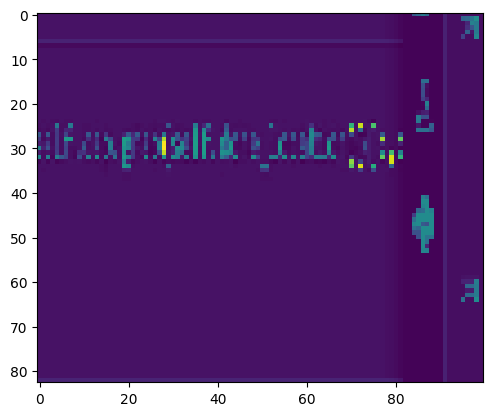

In [58]:
time.sleep(2)# dino fotosu
image=env.get_observation()[0]
#image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
from  mss import mss# deneemm yanılma noktası 
import numpy as np
import matplotlib.pyplot as plt
import time,cv2
# Ekran görüntüsünü alın
m = mss()
game={"top": 300, "left": 550, "width": 600, "height": 200}
score={"top": 290, "left": 1230, "width": 100, "height": 40}
done={"top":330 ,"left": 830,"width":270  ,"height": 30}
time.sleep(2)
screenshot = m.grab(done)

# Ekran görüntüsünü NumPy dizisine dönüştürün
image = np.array(screenshot)[:,:,:3]

# Renkleri BGR'den RGB'ye dönüştürün (OpenCV varsayımı)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Bu satırı ekleyin

# Ekran görüntüsünü gösterin
# plt.imshow(image)
# plt.show()

cv2.imshow("Game",image)
if cv2.waitKey(1) & 0xFF== ord("q"):
    cv2.destroyAllWindows()

In [22]:
import cv2# deneme yanılma 
img=cv2.imread("dene.png")
if img is None:
    print("Resim yüklenemedi!")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye dönüştürme
cv2.imshow("Game",img)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()
if cv2.waitKey(0) & 0xFF== ord("q"):
    cv2.destroyAllWindows()

# test enviroment

In [52]:
env=WebGame()

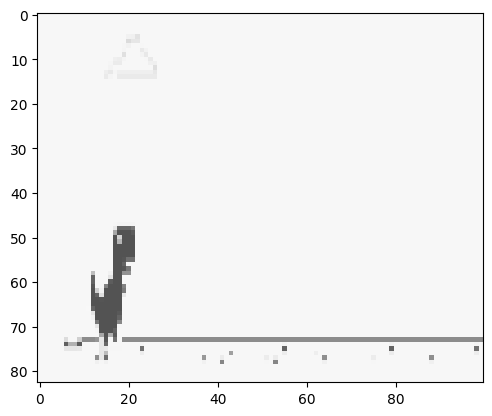

In [33]:
time.sleep(2)
obs=env.get_observation()
plt.imshow(cv2.cvtColor(obs[0],cv2.COLOR_GRAY2BGR))

True


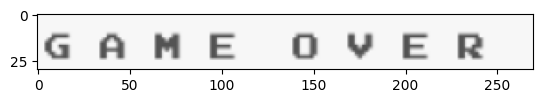

In [34]:
time.sleep(2)
done,done_cap=env.get_done()
print(done)
plt.imshow(done_cap)

In [31]:

tim(2)#            return new_observation,reward,done,info

for episode in range(5):
    obs=env.reset()
    done=False
    total_reward=0
    while not done:
        obs,reward,done,info=env.step(env.action_space.sample())
        total_reward+=reward
    print(f"total reward for episode {episode} is {total_reward}")

total reward for episode 0 is 42
total reward for episode 1 is 34
total reward for episode 2 is 44
total reward for episode 3 is 35
total reward for episode 4 is 35


# create callback

In [18]:
class WebGame(Env):
    #setup the environment action and observation shapes
    def __init__(self):
        #Subclass model
        super().__init__()
        #setup spaces
        self.observation_space=spaces.Box(low=0,high=255,shape=(1,83,100),dtype=np.uint8)
        # self.action_space=Discrete(3)
        self.action_space=spaces.Discrete(3)
        #define extraction parameters for the game
        self.cap=mss()
        # ekran 125 buyuklugunde 
        self.game_location={"top": 320, "left": 550, "width": 500, "height": 150}
        self.score_location={"top": 290, "left": 1230, "width": 100, "height": 40}#scoru gosteriyor
        self.done_location={"top":330 ,"left": 830,"width":270  ,"height": 30}
        
    # what is called to do something in the game
    #AssertionError: The `step()` method must return five values: obs, reward, terminated, truncated, info. Actual: 4 values returned.

    def step(self,action):
        #action key - 0=space,1=duck(down),2=no action(no op)
        action_map={0:"space",1:"down",2:"no_op"}
        if action!=2:
            pyautogui.press(action_map[action])
        #checking wheter the game is done
        done,done_cap=self.get_done()
        #get the next observation
        new_observation=self.get_observation()
        #reward -we get a point for every frame
        reward=int(1)
        #info dictionary
        info={}
        #print(type(new_observation),type(reward),type(done),type(info))
        return new_observation,reward,done,True,info
    # visualize the game
    def render(self):#                                                              
        # plt.imshow(cv2.cvtColor(self.get_observation()[0],cv2.COLOR_GRAY2BGR))
        cv2.imshow("Game",np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(0) & 0xFF ==ord("q"):
            self.close()
        
    #reset the game
    def reset(self,seed=None):
        time.sleep(1)
        pyautogui.press("space")
        info={}
        return (self.get_observation(),info)
    #this closes down the observation
    def close(self):
        cv2.destroyAllWindows()
    #get the part of the observation of the game that we want
    def get_observation(self):
        # get screen capture of game
        raw=np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray=cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(100,83))
        channel=np.reshape(resized,(1,83,100))
        return channel
    #get the done text
    def get_done(self):
        done_cap=np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings=["GAME","GAHE"]
        done=False
        res=pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done=True        
        return done,done_cap

In [19]:
env=WebGame()

In [20]:
env.observation_space,env.action_space

(Box(0, 255, (1, 83, 100), uint8), Discrete(3))

In [21]:
import os 
from stable_baselines3.common.callbacks import BaseCallback

from stable_baselines3.common import env_checker
env_checker.check_env(env)


In [22]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [23]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [27]:
callback = TrainAndLoggingCallback(check_freq=100, save_path=CHECKPOINT_DIR)


## 3.2 Build DQN and Train

In [28]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [ ]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=12000, learning_starts=1000)
model.learn(total_timesteps=1000, callback=callback)


In [40]:
model=DQN.load("train/best_model_600")

# 4. Test out Model

In [41]:
for episode in range(5): 
    obs ,_= env.reset()
    done = False
    total_reward = 0 
    while not done:  
        action, _ = model.predict(obs)
        obs, reward,  done, _,info = env.step(int(action))
        total_reward += reward 
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(1)            

Total Reward for epi     sode 0 is 25
Total Reward for epi     sode 1 is 25
Total Reward for epi     sode 2 is 25
Total Reward for epi     sode 3 is 36
Total Reward for epi     sode 4 is 37
